In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
import statsmodels.api as sm  
import scipy.stats as stats  

In [2]:
df=pd.read_csv("Data_to_Transform.csv")

In [3]:
df

,ModeratePositiveSkew,HighlyPositiveSkew,ModerateNegativeSkew,HighlyNegativeSkew
0,0.899990,2.895074,11.180748,9.027485
1,1.113554,2.962385,10.842938,9.009762
2,1.156830,2.966378,10.817934,9.006134
3,1.264131,3.000324,10.764570,9.000125
4,1.323914,3.012109,10.753117,8.981296
...,...,...,...,...
9995,14.749050,16.289513,-2.980821,-3.254882
9996,14.854474,16.396252,-3.147526,-3.772332
9997,15.262103,17.102991,-3.517256,-4.717950
9998,15.269983,17.628467,-4.689833,-5.670496


In [4]:
df1=df.copy()

In [11]:
# log transformation
df1["ModeratePositiveSkew_log"] = np.log(df1.ModeratePositiveSkew)
df1.ModeratePositiveSkew_log

0      -0.105371
1       0.107557
2       0.145684
3       0.234385
4       0.280593
          ...   
9995    2.691179
9996    2.698301
9997    2.725373
9998    2.725889
9999    2.785290
Name: ModeratePositiveSkew_log, Length: 10000, dtype: float64

In [12]:
# reciprocal transformation
df1["HighlyPositiveSkew_recip"] = 1/df.HighlyPositiveSkew
df1.HighlyPositiveSkew_recip

0       0.345414
1       0.337566
2       0.337112
3       0.333297
4       0.331993
          ...   
9995    0.061389
9996    0.060990
9997    0.058469
9998    0.056726
9999    0.055395
Name: HighlyPositiveSkew_recip, Length: 10000, dtype: float64

In [7]:
#square transformation
df1["HighlyNegativeSkew_square"]= df1.HighlyNegativeSkew**(1/1.2)

In [13]:
df1.HighlyNegativeSkew_square

0       6.256128
1       6.245891
2       6.243796
3       6.240324
4       6.229442
          ...   
9995         NaN
9996         NaN
9997         NaN
9998         NaN
9999         NaN
Name: HighlyNegativeSkew_square, Length: 10000, dtype: float64

In [14]:
# square root transformation
df1['ModeratePositiveSkew_sqrt'] = np.sqrt(df.ModeratePositiveSkew)
df1.ModeratePositiveSkew_sqrt

0       0.948678
1       1.055251
2       1.075560
3       1.124336
4       1.150615
          ...   
9995    3.840449
9996    3.854150
9997    3.906674
9998    3.907683
9999    4.025483
Name: ModeratePositiveSkew_sqrt, Length: 10000, dtype: float64

In [15]:
df1["HighlyPositiveSkew_boxcox"], parameters=stats.boxcox(df1.HighlyPositiveSkew)
df1.HighlyPositiveSkew_boxcox

0       0.812909
1       0.825921
2       0.826679
3       0.833058
4       0.835247
          ...   
9995    1.457701
9996    1.459189
9997    1.468681
9998    1.475357
9999    1.480525
Name: HighlyPositiveSkew_boxcox, Length: 10000, dtype: float64

In [16]:
df1["HighlyNegativeSkew_yeojohnson"], parameters=stats.yeojohnson(df1.HighlyNegativeSkew)
df1.HighlyNegativeSkew_yeojohnson

0       51.081487
1       50.898041
2       50.860530
3       50.798432
4       50.604084
          ...    
9995    -1.433326
9996    -1.545673
9997    -1.722267
9998    -1.872430
9999    -2.053503
Name: HighlyNegativeSkew_yeojohnson, Length: 10000, dtype: float64

In [18]:
#QUANTILE TRANSFORMATION:  
from sklearn.preprocessing import QuantileTransformer   
qt=QuantileTransformer(output_distribution='normal') 

C:\Users\karth\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


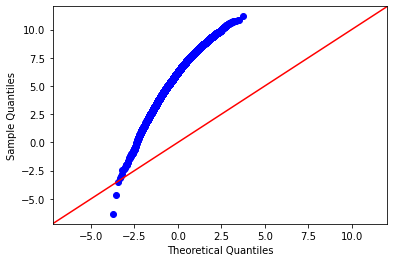

C:\Users\karth\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


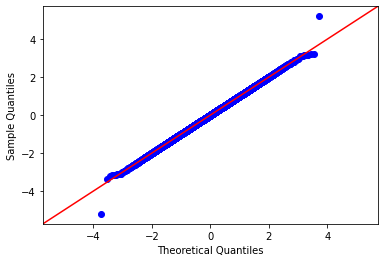

In [21]:
df["Moderate Negative Skew_1"]=qt.fit_transform(df[["ModerateNegativeSkew"]])  
sm.qqplot(df['ModerateNegativeSkew'],line='45')  
plt.show()
sm.qqplot(df['Moderate Negative Skew_1'],line='45')  
plt.show()  